In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/zvikinozadze/myfitnesspal-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pengenjagoNLP
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zvikinozadze/myfitnesspal-dataset


100%|██████████| 160M/160M [00:01<00:00, 94.6MB/s]


In [ ]:
file = r"/content/myfitnesspal-dataset/mfp-diaries.tsv"
data = pd.read_csv(file, sep='\t')

data.head()
data.columns

Index(['1', '2014-09-14',
       '[{"meal": "MY food", "dishes": [{"nutritions": [{"name": "Calories", "value": "412"}, {"name": "Carbs", "value": "29"}, {"name": "Fat", "value": "24"}, {"name": "Protein", "value": "21"}, {"name": "Sodium", "value": "258"}, {"name": "Sugar", "value": "29"}], "name": "my - McDonalds Espresso Pronto\u00ae Flat White, 2 TALL"}, {"nutritions": [{"name": "Calories", "value": "170"}, {"name": "Carbs", "value": "25"}, {"name": "Fat", "value": "5"}, {"name": "Protein", "value": "20"}, {"name": "Sodium", "value": "260"}, {"name": "Sugar", "value": "2"}], "name": "Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g"}, {"nutritions": [{"name": "Calories", "value": "176"}, {"name": "Carbs", "value": "33"}, {"name": "Fat", "value": "1"}, {"name": "Protein", "value": "5"}, {"name": "Sodium", "value": "195"}, {"name": "Sugar", "value": "0"}], "name": "Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g"}, {"nutritions": [{"name": "Calories", "value": "342"}, {"n

In [ ]:
import json
import itertools
import numpy as np
import pandas as pd
from time import time
import csv

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(r'/content/myfitnesspal-dataset/mfp-diaries.tsv', sep='\t')
data.head()

,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"": [{""name"": ""Calories"", ""value"": ""412""}, {""name"": ""Carbs"", ""value"": ""29""}, {""name"": ""Fat"", ""value"": ""24""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""258""}, {""name"": ""Sugar"", ""value"": ""29""}], ""name"": ""my - McDonalds Espresso Pronto\u00ae Flat White, 2 TALL""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""176""}, {""name"": ""Carbs"", ""value"": ""33""}, {""name"": ""Fat"", ""value"": ""1""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""195""}, {""name"": ""Sugar"", ""value"": ""0""}], ""name"": ""Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""342""}, {""name"": ""Carbs"", ""value"": ""34""}, {""name"": ""Fat"", ""value"": ""12""}, {""name"": ""Protein"", ""value"": ""24""}, {""name"": ""Sodium"", ""value"": ""402""}, {""name"": ""Sugar"", ""value"": ""34""}], ""name"": ""Pauls - Smarter White Milk, 600 ml""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""22""}, {""name"": ""Fat"", ""value"": ""7""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""310""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Quest Bar - Cookies and Cream, 1 bar""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""46""}, {""name"": ""Fat"", ""value"": ""0""}, {""name"": ""Protein"", ""value"": ""0""}, {""name"": ""Sodium"", ""value"": ""100""}, {""name"": ""Sugar"", ""value"": ""22""}], ""name"": ""Gu Sports - Chomps, 8 pieces""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""160""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""240""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest - Protein Bar Chocolate Peanut Butter, 1 bar (60 g)""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""686""}, {""name"": ""Carbs"", ""value"": ""59""}, {""name"": ""Fat"", ""value"": ""31""}, {""name"": ""Protein"", ""value"": ""40""}, {""name"": ""Sodium"", ""value"": ""1,105""}, {""name"": ""Sugar"", ""value"": ""9""}], ""name"": ""Grilld - Simply Grilled (Real), 1.25 burger""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""252""}, {""name"": ""Carbs"", ""value"": ""27""}, {""name"": ""Fat"", ""value"": ""14""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""352""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Grilld - Snack Chips, 1 snack size""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""196""}, {""name"": ""Carbs"", ""value"": ""15""}, {""name"": ""Fat"", ""value"": ""10""}, {""name"": ""Protein"", ""value"": ""10""}, {""name"": ""Sodium"", ""value"": ""176""}, {""name"": ""Sugar"", ""value"": ""7""}], ""name"": ""Tasti - Salted Caramel Protein Bar, 40 g""}], ""sequence"": 1}]","{""total"": [{""name"": ""Calories"", ""value"": 2924}, {""name"": ""Carbs"", ""value"": 340}, {""name"": ""Fat"", ""value"": 114}, {""name"": ""Protein"", ""value"": 186}, {""name"": ""Sodium"", ""value"": 3658}, {""n

In [ ]:
# parameters: name of dishes, dictionary
# this method adds food if it doesn't exists
def add_food(food,all_foods):
    global idx
    if food not in all_foods:
        all_foods[food] = idx
        idx+=1

# one person may eat max 6 times a day
# This method will make unique foods dictionary
def put_all_food_names(food_entries,all_foods):
    for food_entrie in json.loads(food_entries):
        for food in food_entrie["dishes"]:
            add_food(food["name"].split(",")[0],all_foods)


# This method gets an information about daily goals and total received calories and other nutrients
def get_agregate_intake_goal(agregate_intake_goal):
    res = []
    for nutritient in agregate_intake_goal["total"]:
        res.append(nutritient["value"])
    for nutritient in agregate_intake_goal["goal"]:
        res.append(nutritient["value"])
    return res

In [ ]:
food_enumeration = {} # Dictionary where will be unique foods. Key will be name and value id
idx = 1 # ID inumeration start point

test_dataframe = data.copy()
start = time()

test_dataframe.iloc[:,2].apply(lambda elem: put_all_food_names(elem,food_enumeration))

print("elapsed time - " + str(time()-start))
print("length of all food - " + str(len(food_enumeration)))

elapsed time - 41.75103759765625
length of all food - 628878


In [ ]:
# food_ids contains food Id's eaten in particular meal and you can check names in all_foods
def parse_new_applicants(row,all_foods):
    global parsed_df
    values = []
    values.append(row[0]) # user_id
    values.append(row[1]) # date

    food_entries = json.loads(row[2])
    agregate_intake_goal = get_agregate_intake_goal(json.loads(row[3]))

    food_ids = []
    for food_entrie in food_entries:
        food_names = [food["name"].split(",")[0] for food in food_entrie["dishes"]]
        food_ids_new = [all_foods[food_name] for food_name in food_names]
        food_ids+=food_ids_new

    values.append(food_entrie["sequence"])
    values.append(food_ids)
    values += agregate_intake_goal

    dictionary = dict(zip(df_columns, values))
    parsed_df.append(dictionary)

In [ ]:
start = time()

# column names for new dataframe
df_columns = ['user_id','date','sequence','food_ids',
           'total_calories','total_carbs','total_fat','total_protein','total_sodium','total_sugar',
           'goal_calories','goal_carbs','goal_fat','goal_protein','goal_sodium','goal_sugar']


# This global variable will be feed with parsed data
parsed_df = []

test_dataframe = data
_ = test_dataframe.apply(lambda row : parse_new_applicants(row,food_enumeration), axis = 1)
parsed_df = pd.DataFrame.from_dict(parsed_df)

end = time()
print("elapsed time - " + str(end-start))

elapsed time - 108.96986722946167


In [ ]:
import os
import json

# Ensure the directory exists
os.makedirs('../data', exist_ok=True)

# Exchange key and value in the dictionary
food_enumeration = {value: key for key, value in food_enumeration.items()}

# Save food name and ID as a new JSON file
with open('/content/myfitnesspal-dataset/foods.json', 'w') as fp:
    json.dump(food_enumeration, fp)

# Save the parsed DataFrame as a CSV file
parsed_df.to_csv(r'/content/myfitnesspal-dataset/myFitnessPal_parsed.csv', index=False)

In [ ]:
data = pd.read_csv(r"/content/myfitnesspal-dataset/myFitnessPal_parsed.csv")
data.head()

,user_id,date,sequence,food_ids,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar
0,1,2014-09-15,1,"[1, 2, 3, 4, 4]",2430,96,37.0,50.0,855.0,63.0,1572.0,196.0,52.0,79.0,2300.0,59.0
1,1,2014-09-16,1,"[5, 1, 2, 3, 6, 7]",1862,158,54.0,114.0,2215.0,100.0,1832.0,229.0,61.0,92.0,2300.0,69.0
2,1,2014-09-17,1,"[1, 2, 3, 6, 8, 9, 10]",2251,187,60.0,98.0,1765.0,105.0,1685.0,210.0,56.0,85.0,2300.0,63.0
3,1,2014-09-18,1,"[1, 6, 2, 3, 11, 12]",2001,113,81.0,202.0,1101.0,71.0,1597.0,199.0,53.0,80.0,2300.0,60.0
4,1,2014-09-19,1,"[1, 7, 13, 12, 2, 3, 12, 12]",2158,180,89.0,115.0,1998.0,84.0,1589.0,198.0,53.0,80.0,2300.0,60.0


In [ ]:
print(data)

        user_id        date  sequence  \
0             1  2014-09-15         1   
1             1  2014-09-16         1   
2             1  2014-09-17         1   
3             1  2014-09-18         1   
4             1  2014-09-19         1   
...         ...         ...       ...   
587181     9897  2015-03-02         4   
587182     9897  2015-03-03         3   
587183     9897  2015-03-04         2   
587184     9897  2015-03-14         3   
587185     9897  2015-03-15         4   

                                                 food_ids  total_calories  \
0                                         [1, 2, 3, 4, 4]            2430   
1                                      [5, 1, 2, 3, 6, 7]            1862   
2                                  [1, 2, 3, 6, 8, 9, 10]            2251   
3                                    [1, 6, 2, 3, 11, 12]            2001   
4                            [1, 7, 13, 12, 2, 3, 12, 12]            2158   
...                                          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.DataFrame(data)
# Check for missing values in the dataset
print(df.isnull().sum())

# Fill missing values with 0 (or other strategy, e.g., mean)
df.fillna(0, inplace=True)

user_id           0
date              0
sequence          0
food_ids          0
total_calories    0
total_carbs       0
total_fat         0
total_protein     0
total_sodium      0
total_sugar       0
goal_calories     0
goal_carbs        0
goal_fat          0
goal_protein      0
goal_sodium       0
goal_sugar        0
dtype: int64


In [ ]:
# Create features: Differences between total and goal values
df["calorie_diff"] = df["total_calories"] - df["goal_calories"]
df["carb_diff"] = df["total_carbs"] - df["goal_carbs"]
df["fat_diff"] = df["total_fat"] - df["goal_fat"]
df["protein_diff"] = df["total_protein"] - df["goal_protein"]
df["sodium_diff"] = df["total_sodium"] - df["goal_sodium"]

# Target variable: Exceeds sugar goal (1 if total_sugar > goal_sugar, else 0)
df["exceeds_sugar_goal"] = (df["total_sugar"] > df["goal_sugar"]).astype(int)

# Select features and target
features = ["calorie_diff", "carb_diff", "fat_diff", "protein_diff", "sodium_diff"]
X = df[features]
y = df["exceeds_sugar_goal"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\\n", confusion_matrix(y_test, y_pred))

# Feature importance
importance = model.coef_[0]
for i, feature in enumerate(features):
    print(f"{feature}: {importance[i]:.4f}")

Accuracy: 0.7507876496534341
Classification Report:\n               precision    recall  f1-score   support

           0       0.75      0.93      0.83     75721
           1       0.76      0.43      0.55     41717

    accuracy                           0.75    117438
   macro avg       0.76      0.68      0.69    117438
weighted avg       0.75      0.75      0.73    117438

Confusion Matrix:\n [[70140  5581]
 [23686 18031]]
calorie_diff: 0.0017
carb_diff: 0.0004
fat_diff: -0.0005
protein_diff: -0.0003
sodium_diff: 0.0001


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve

# Step 1: Apply SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

# Step 2: Train the Logistic Regression model on resampled data
model_smote = LogisticRegression()
model_smote.fit(X_resampled, y_resampled)

# Step 3: Make predictions with the default threshold
y_pred_proba = model_smote.predict_proba(X_test)[:, 1]  # Probability for Class 1

# Step 4: Adjust decision threshold for better recall
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")

# Use the new threshold for predictions
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Step 5: Evaluate the new model
print("Accuracy with adjusted threshold:", accuracy_score(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))


Class distribution after SMOTE:
exceeds_sugar_goal
0    303350
1    303350
Name: count, dtype: int64
Optimal threshold: 0.5111439972388827
Accuracy with adjusted threshold: 0.7171358504061718
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77     75721
           1       0.59      0.66      0.62     41717

    accuracy                           0.72    117438
   macro avg       0.70      0.70      0.70    117438
weighted avg       0.73      0.72      0.72    117438

Confusion Matrix:
 [[56643 19078]
 [14141 27576]]


Random Forest Classifier:
Accuracy: 0.7705768150002554
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.84     75721
           1       0.76      0.52      0.62     41717

    accuracy                           0.77    117438
   macro avg       0.77      0.71      0.73    117438
weighted avg       0.77      0.77      0.76    117438

Confusion Matrix:
 [[68785  6936]
 [20007 21710]]

Gradient Boosting Classifier:
Accuracy: 0.7691633031897682
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84     75721
           1       0.79      0.47      0.59     41717

    accuracy                           0.77    117438
   macro avg       0.78      0.70      0.72    117438
weighted avg       0.77      0.77      0.75    117438

Confusion Matrix:
 [[70548  5173]
 [21936 19781]]

Optimal Threshold for Gradient Boosting: 0.36726913575705944
Accuracy with Adjuste

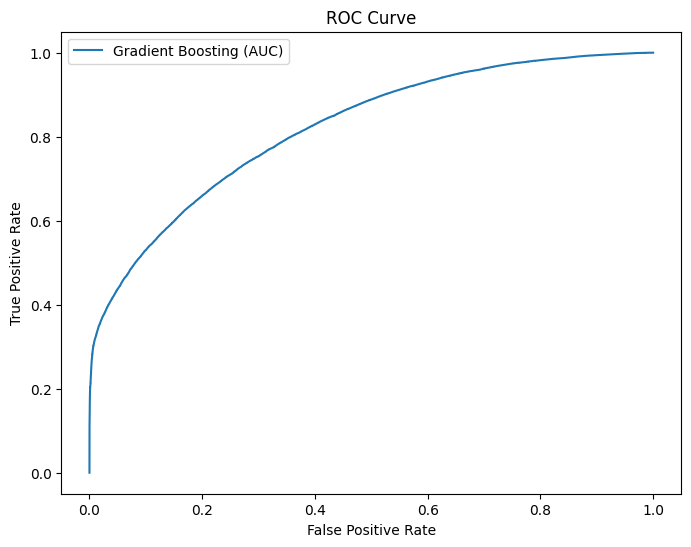

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_preds))
print("Classification Report:\n", classification_report(y_test, gb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_preds))

# Determine Optimal Threshold for Gradient Boosting
gb_probs = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, gb_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("\nOptimal Threshold for Gradient Boosting:", optimal_threshold)

# Adjust Predictions with Optimal Threshold
gb_adjusted_preds = (gb_probs >= optimal_threshold).astype(int)
print("Accuracy with Adjusted Threshold:", accuracy_score(y_test, gb_adjusted_preds))
print("Classification Report:\n", classification_report(y_test, gb_adjusted_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_adjusted_preds))

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Gradient Boosting (AUC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
